In [19]:
# Import necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import os


# Display settings for better readability in notebooks
pd.set_option('display.max_colwidth', 150)

# Set style for seaborn
sns.set(style='whitegrid')

In [20]:
# Load cleaned datasets
train_cleaned = pd.read_csv('data/processed/train_cleaned.csv')
dev_cleaned = pd.read_csv('data/processed/dev_cleaned.csv')
test_cleaned = pd.read_csv('data/processed/test_cleaned.csv')

# Display the first few rows of the training set
print("Cleaned Train Dataset:")
display(train_cleaned.head())

Cleaned Train Dataset:


,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,claim_cleaned,explanation_cleaned,main_text_cleaned
0,15661,"""The money the Clinton Foundation took from from foreign governments while Hillary Clinton was secretary of state """"is clearly illegal. … The Cons...","April 26, 2015","""Gingrich said the Clinton Foundation """"took money from from foreign governments while (Hillary Clinton) was secretary of state. It is clearly ill...",Katie Sanders,"""Hillary Clinton is in the political crosshairs as the author of a new book alleges improper financial ties between her public and personal life. ...","https://www.wsj.com/articles/clinton-foundation-defends-acceptance-of-foreign-donations-1424302856, https://www.washingtonpost.com/politics/for-cl...",false,"Foreign Policy, PunditFact, Newt Gingrich,",the money the clinton foundation took from from foreign governments while hillary clinton was secretary of state is clearly illegal … the constitu...,gingrich said the clinton foundation took money from from foreign governments while hillary clinton was secretary of state it is clearly illegal …...,hillary clinton is in the political crosshairs as the author of a new book alleges improper financial ties between her public and personal life at...
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011","This article reports on the results of a study of nearly 170,000 women who had screening mammograms beginning between age 40-59. The study found t...",,"While the financial costs of screening mammography & false-positive recalls & biopsies were not included in the study, readers would benefit from ...",,mixture,"Screening,WebMD,women's health",annual mammograms may have more falsepositives,this article reports on the results of a study of nearly women who had screening mammograms beginning between age the study found that over ten ye...,while the financial costs of screening mammography falsepositive recalls biopsies were not included in the study readers would benefit from being ...
2,11358,SBRT Offers Prostate Cancer Patients High Cancer Control and Low Toxicity in Fewer Treatments,"September 28, 2016",This news release describes five-year outcomes for 309 men with early-stage prostate cancer who received stereotactic body radiation therapy (SBRT...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,Kathlyn Stone","The news release quotes lead researcher Robert Meier, MD, saying previous studies have shown SBRT to be “a cost-effective and faster alternative t...","https://www.healthnewsreview.org/wp-content/uploads/2016/09/iStock_371304_SMALL.jpg,https://www.healthnewsreview.org/wp-content/uploads/2016/09/AS...",mixture,"Association/Society news release,Cancer",sbrt offers prostate cancer patients high cancer control and low toxicity in fewer treatments,this news release describes fiveyear outcomes for men with earlystage prostate cancer who received stereotactic body radiation therapy sbrt which ...,the news release quotes lead researcher robert meier md saying previous studies have shown sbrt to be “a costeffective and faster alternative to i...
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has Potential","November 8, 2011","While the story does many things well, the overall framing of the story is that the vaccine “shows promise,” when the evidence actually points in ...",,"The story does discuss costs, but the framing is problematic. The story, based on a conversation with one source, the study’s lead investigator, s...",http://clinicaltrials.gov/ct2/results?term=cancer&recr=Open&no_unk=Y,true,"Cancer,WebMD,women's health",study vaccine for breast ovarian cancer has potential,while the story does many things well the overall framing of the story is that the vaccine “shows promise” when the evidence actually points in th...,the story does discuss costs but the framing is problematic the story based on a conversation with one source the study’s lead investigator says “...
4,112

/var/folders/71/ybd134t50bl9zh8hzq85874r0000gn/T/ipykernel_98425/1533451280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_cleaned, palette='viridis')


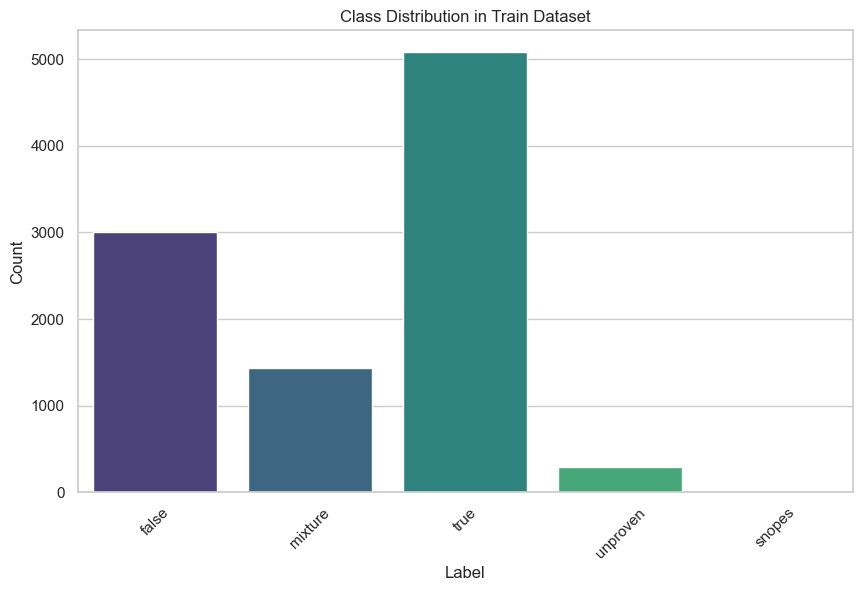

Class Distribution in Train Dataset (%):
label
true        51.789903
false       30.606833
mixture     14.625191
unproven     2.967874
snopes       0.010199
Name: proportion, dtype: float64


In [21]:
# Class distribution in the training set
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_cleaned, palette='viridis')
plt.title('Class Distribution in Train Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display the class distribution percentages
class_distribution = train_cleaned['label'].value_counts(normalize=True) * 100
print("Class Distribution in Train Dataset (%):")
print(class_distribution)

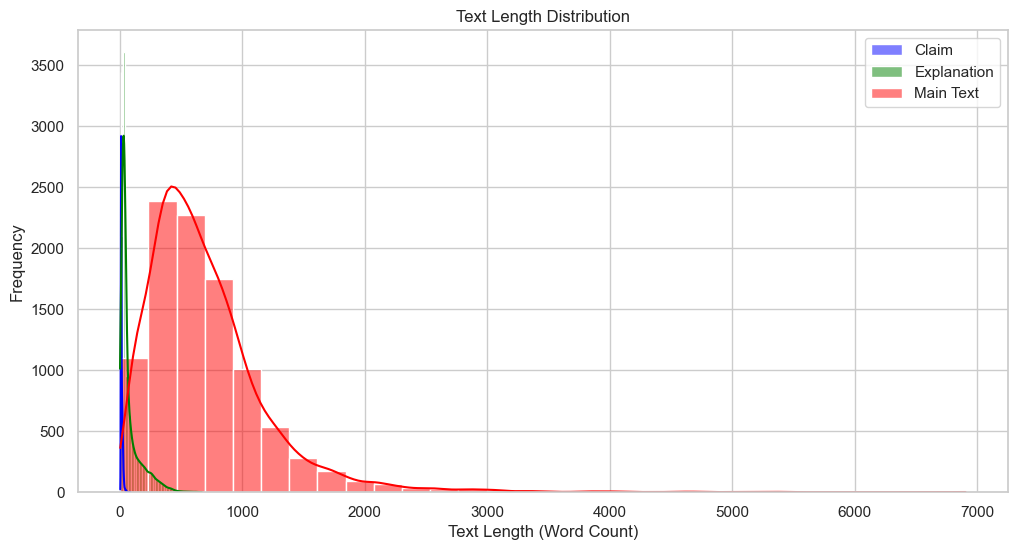

In [22]:
# Function to calculate text length
def text_length(text):
    if isinstance(text, str):
        return len(text.split())
    return 0

# Calculate text length for each field
train_cleaned['claim_length'] = train_cleaned['claim_cleaned'].apply(text_length)
train_cleaned['explanation_length'] = train_cleaned['explanation_cleaned'].apply(text_length)
train_cleaned['main_text_length'] = train_cleaned['main_text_cleaned'].apply(text_length)

# Plot text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(train_cleaned['claim_length'], bins=30, color='blue', label='Claim', kde=True)
sns.histplot(train_cleaned['explanation_length'], bins=30, color='green', label='Explanation', kde=True)
sns.histplot(train_cleaned['main_text_length'], bins=30, color='red', label='Main Text', kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length (Word Count)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Most Common Words in Claims:
[('the', 4052), ('to', 3373), ('in', 3291), ('a', 3290), ('of', 3123), ('for', 1823), ('and', 1722), ('that', 972), ('on', 920), ('is', 876)]


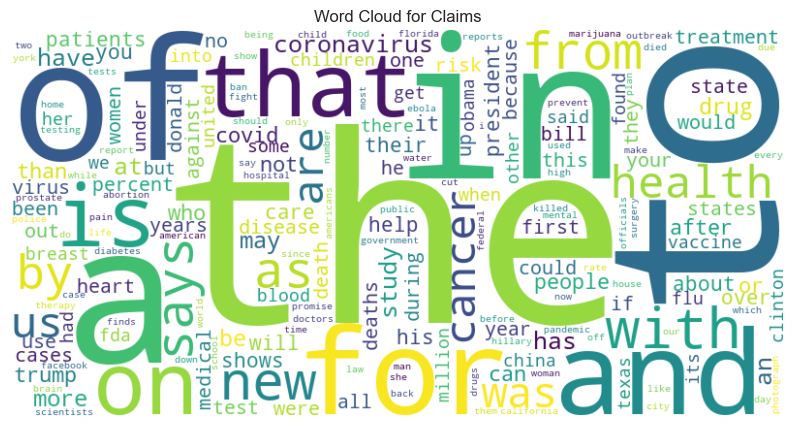

In [23]:
# Function to generate word frequency
def get_word_frequency(text_series):
    # Ensure all values are strings and drop NaN values
    text_series = text_series.dropna().astype(str)
    
    all_words = ' '.join(text_series).split()  # Join all text and split into words
    word_freq = Counter(all_words)  # Count word occurrences
    return word_freq

# Get word frequencies for claims, explanations, and main text
claim_word_freq = get_word_frequency(train_cleaned['claim_cleaned'])
explanation_word_freq = get_word_frequency(train_cleaned['explanation_cleaned'])
main_text_word_freq = get_word_frequency(train_cleaned['main_text_cleaned'])

# Display most common words in claims
print("Most Common Words in Claims:")
print(claim_word_freq.most_common(10))

# Word Cloud for claims
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(claim_word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Claims')
plt.axis('off')
plt.show()

/var/folders/71/ybd134t50bl9zh8hzq85874r0000gn/T/ipykernel_98425/478381338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_cleaned, palette='viridis')


EDA figures saved successfully in 'results/figures'!


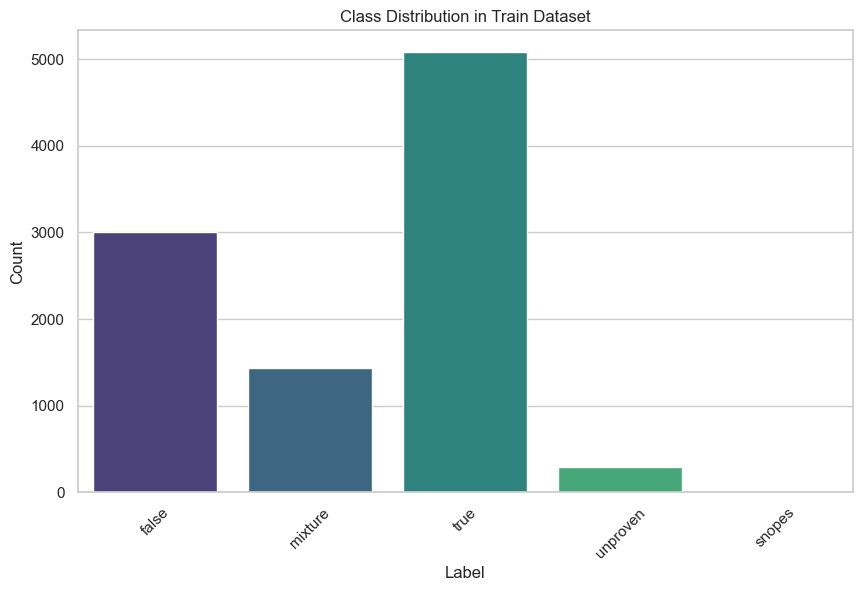

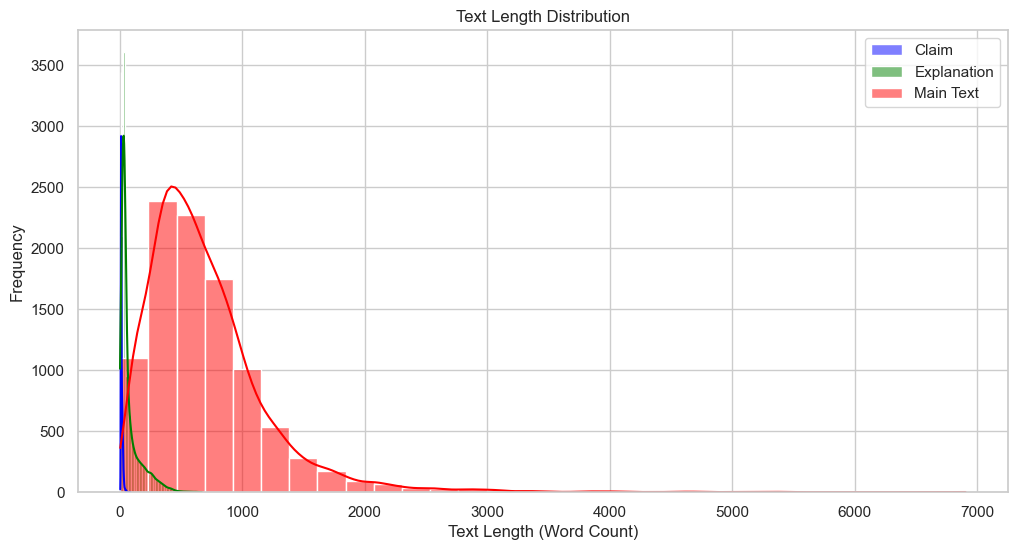

In [ ]:
# Create directory for results if it doesn't exist
os.makedirs('results/figures', exist_ok=True)

# Save figures as images
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_cleaned, palette='viridis')
plt.title('Class Distribution in Train Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('results/figures/class_distribution.png')

plt.figure(figsize=(12, 6))
sns.histplot(train_cleaned['claim_length'], bins=30, color='blue', label='Claim', kde=True)
sns.histplot(train_cleaned['explanation_length'], bins=30, color='green', label='Explanation', kde=True)
sns.histplot(train_cleaned['main_text_length'], bins=30, color='red', label='Main Text', kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length (Word Count)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('results/figures/text_length_distribution.png')

print("EDA figures saved successfully in 'results/figures'!")